In [50]:
!pip install tensorflow==2.2.0
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pathlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=keras.utils.get_file("flower_photos",origin=url,cache_dir=".",untar=True)

In [52]:
data_dir=pathlib.Path(data_dir)

In [53]:
img_count=len(list(data_dir.glob("*/*.jpg")))

In [54]:
img_count

3670

In [55]:
import PIL
roses=list(data_dir.glob("roses/*.jpg"))

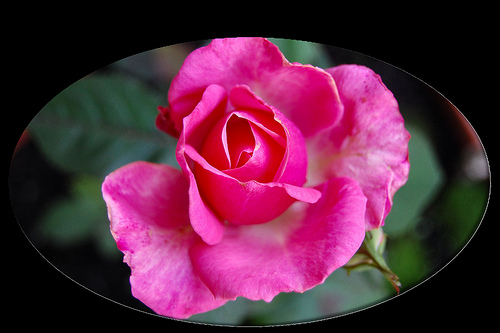

In [56]:
PIL.Image.open(str(roses[1]))

In [57]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [58]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

x=[]
y=[]

In [59]:
import cv2
for name,images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    x.append(resized_img)
    y.append(flowers_labels_dict[name])

In [60]:
import numpy as np
x=np.array(x)
y=np.array(y)

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.80,random_state=42)
x_train=x_train/255
x_test=x_test/255

In [66]:
from keras.layers import RandomFlip,RandomRotation,RandomZoom
da=keras.Sequential([
    keras.Input(shape=(180,180,3)),
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)

])
model=keras.Sequential([ da,
                        layers.Conv2D(32,3,activation="relu"),
                        layers.MaxPooling2D(),
                        layers.Conv2D(32,3,activation="relu"),
                        layers.MaxPooling2D(),
                        layers.Conv2D(32,3,activation="relu"),
                        layers.MaxPooling2D(),
                        layers.Dropout(0.5),
                        layers.Flatten(),
                        layers.Dense(60,activation="relu"),
                        layers.Dense(5,activation="softmax")
    
    
    
])

In [71]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [72]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"


23/23 [==============================] - 50s 2s/step - loss: 1.4271 - accuracy: 0.3760
Epoch 2/20
23/23 [==============================] - 45s 2s/step - loss: 1.1925 - accuracy: 0.5109
Epoch 3/20
23/23 [==============================] - 43s 2s/step - loss: 1.1027 - accuracy: 0.5518
Epoch 4/20
23/23 [==============================] - 30s 1s/step - loss: 1.0401 - accuracy: 0.5913
Epoch 5/20
23/23 [==============================] - 31s 1s/step - loss: 1.0104 - accuracy: 0.6131
Epoch 6/20
23/23 [==============================] - 32s 1s/step - loss: 1.0077 - accuracy: 0.6104
Epoch 7/20
23/23 [==============================] - 30s 1s/step - loss: 0.9181 - accuracy: 0.6431
Epoch 8/20
23/23 [==============================] - 30s 1s/step - loss: 0.9163 - accuracy: 0.6580
Epoch 9/20
23/23 [==============================] - 30s 1s/step - loss: 0.8698 - accuracy: 0.6812
Epoch 10/20
23/23 [==============================] - 30s 1s/step - loss: 0.8403 - accuracy: 0.6866
Epoch 11/20
23/23 [===========

In [73]:
model.evaluate(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"


92/92 [==============================] - 28s 303ms/step - loss: 1.2596 - accuracy: 0.5950


[1.2596410512924194, 0.5950272679328918]

In [74]:
ypred=model.predict(x_test)

In [75]:
yp=[np.argmax(element) for element in ypred]

In [76]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.60      0.35      0.44       530
           1       0.55      0.70      0.61       497
           2       0.88      0.41      0.56       728
           3       0.56      0.93      0.70       564
           4       0.55      0.65      0.59       617

    accuracy                           0.60      2936
   macro avg       0.63      0.60      0.58      2936
weighted avg       0.64      0.60      0.58      2936



In [77]:
print(confusion_matrix(y_test,yp))

[[183  57  16  47 227]
 [ 26 346  20  73  32]
 [ 35 161 297 184  51]
 [  3  17   3 523  18]
 [ 58  51   3 107 398]]
